In [1]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torch.optim.lr_scheduler import StepLR
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Device configuration
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')


/root/miniconda3/envs/torch2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
import torch.nn as nn

class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Instantiate the VGG model
vgg16 = VGG()

# Print the model architecture
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
import pickle

In [4]:
def load_loaders(file_path):
    with open(file_path, 'rb') as file:
        loaders = pickle.load(file)
    return loaders['train_loader'], loaders['val_loader'], loaders['test_loader']

In [5]:
train_loader, valid_loader, test_loader = load_loaders('data_loaders_final.pkl')


In [6]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset

In [7]:
# Calculate the size of the subset (10% of the original dataset)
subset_size = int(0.1 * len(train_loader.dataset))
# Create indices for the subset
subset_indices = torch.randperm(len(train_loader.dataset))[:subset_size]
# Create a subset using Subset class from torch.utils.data.dataset
subset = Subset(train_loader.dataset, subset_indices)
# Create a new DataLoader for the subset
train_loader_SI = DataLoader(subset, batch_size=train_loader.batch_size, shuffle=True, num_workers=train_loader.num_workers)

In [8]:
!git clone https://github.com/Arhosseini77/data_complexity_measures

fatal: destination path 'data_complexity_measures' already exists and is not an empty directory.


In [9]:
from data_complexity_measures.models.ARH_SeparationIndex import ARH_SeparationIndex

In [10]:
# Instantiate and load the model
model = VGG()  # Make sure CustomResNet is defined as earlier
model.load_state_dict(torch.load('best_model_weights.pth'))
model.to('cuda:1' if torch.cuda.is_available() else 'cpu')
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
# Prepare storage for outputs and labels
features_per_layer = [[] for _ in range(len(model.features))]
labels_list = []

# Function to attach hooks
def get_layer_outputs(layer_idx):
    def hook(module, input, output):
        features_per_layer[layer_idx].append(output.detach())
    return hook

# Attach hooks to each layer
for idx, layer in enumerate(model.features):
    layer.register_forward_hook(get_layer_outputs(idx))

In [12]:
# Pass data through the model and collect layer outputs
with torch.no_grad():
    for inputs, targets in tqdm(train_loader_SI):
        if torch.cuda.is_available():
            inputs = inputs.to('cuda:1')

        # Trigger the hooks and collect layer outputs
        model(inputs)
        labels_list.append(targets)

        # Release GPU memory
        del inputs
        torch.cuda.empty_cache()

# Post-process the data: Flatten and concatenate
for idx, layer_features in enumerate(features_per_layer):
    layer_features = torch.cat([f.view(f.size(0), -1) for f in layer_features])
    features_per_layer[idx] = layer_features

labels = torch.cat(labels_list)

100%|██████████| 40/40 [00:00<00:00, 59.81it/s]


In [14]:
si_layer_train =[]
for features in features_per_layer:
  instance_disturbance = ARH_SeparationIndex(features, labels, normalize=True)
  si = instance_disturbance.si()
  # num_ones = torch.sum(si_data == 1).item()
  # total_elements = si_data.numel()
  # ratio_ones = num_ones / total_elements
  si_layer_train.append(si)

Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 47528.92it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 25178.46it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 49197.62it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 20036.54it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 42124.00it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 57160.55it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 20605.04it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 56251.21it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 36245.34it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 24007.45it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 21981.78it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 54981.88it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 55983.77it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 24479.19it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 17931.26it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 55306.10it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 37847.90it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 31908.32it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 21576.50it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 21986.30it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 56659.72it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 37884.82it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 32703.21it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 26199.86it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 17110.05it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 55507.23it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 56927.50it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 34614.64it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 57457.16it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 27482.48it/s]


Data has been normalized


Calculating SI: 100%|██████████| 5000/5000 [00:00<00:00, 20752.99it/s]


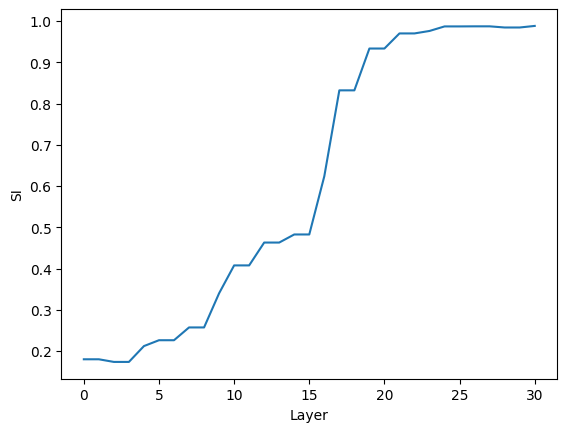

In [15]:
# plot si vs layer for Train
plt.plot(si_layer_train)
plt.xlabel('Layer')
plt.ylabel('SI')
plt.show()